In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2


In [3]:

(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


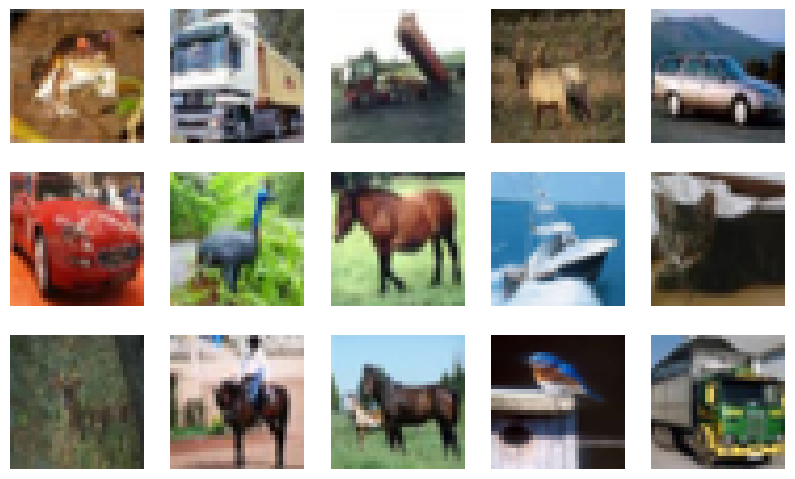

In [4]:

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis("off")


In [5]:
def add_noise_blur(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
    return blurred_image

deg_x_train = np.array([add_noise_blur(img) for img in x_train])
deg_x_test = np.array([add_noise_blur(img) for img in x_test])


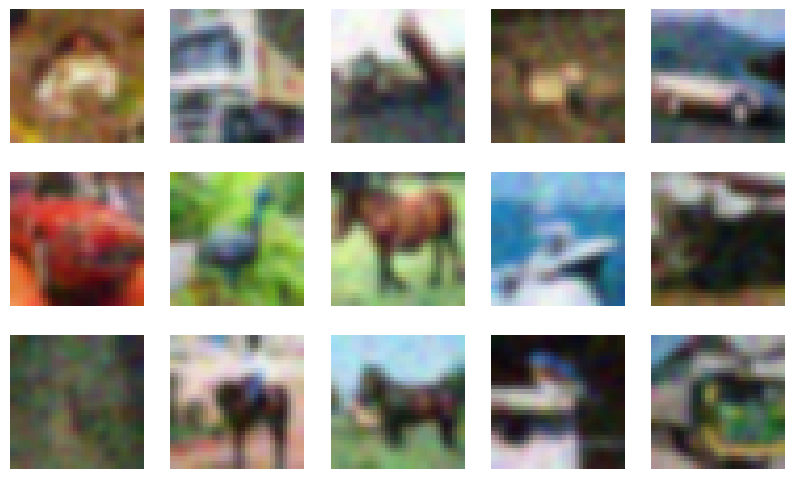

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(deg_x_train[i])
    ax.axis("off")

plt.show()


In [7]:

def build_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder

In [8]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer=Adam(), loss='mse')


In [9]:

autoencoder.fit(deg_x_train, x_train, epochs=10, batch_size=128, validation_data=(deg_x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0209 - val_loss: 0.0068
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0062 - val_loss: 0.0054
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0041 - val_loss: 0.0043


In [10]:

predicted = autoencoder.predict(deg_x_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


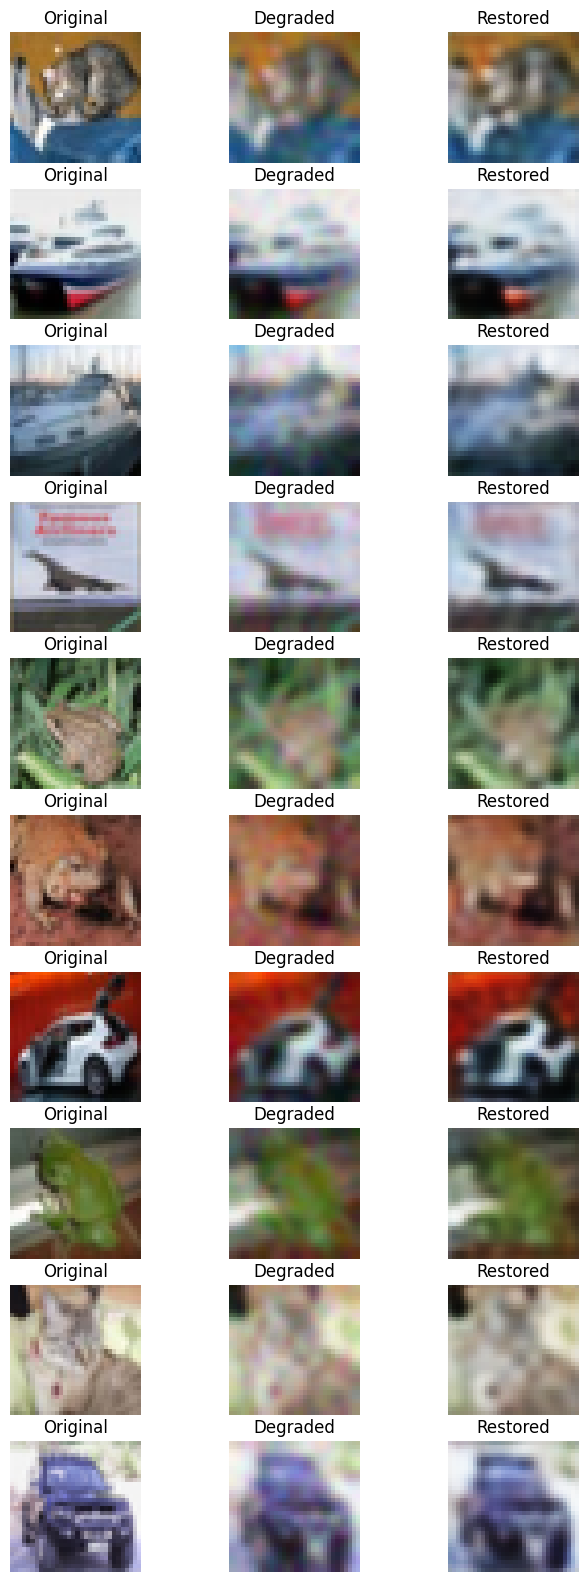

Average PSNR: 23.778223841625696


In [11]:
fig, axes = plt.subplots(10, 3, figsize=(8, 20))
for i in range(10):
    axes[i, 0].imshow(x_test[i])
    axes[i, 0].set_title("Original")
    axes[i, 1].imshow(deg_x_test[i])
    axes[i, 1].set_title("Degraded")
    axes[i, 2].imshow(predicted[i])
    axes[i, 2].set_title("Restored")

    for j in range(3):
        axes[i, j].axis("off")

plt.show()

# Evaluate using PSNR
def psnr(original, restored):
    mse = np.mean((original - restored) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

psnr_values = [psnr(x_test[i], predicted[i]) for i in range(10)]
print("Average PSNR:", np.mean(psnr_values))

In [12]:

img = cv2.imread("/content/curious-bird-1-1374322.jpg")

In [13]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
img = img / 255.0

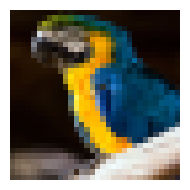

In [14]:

plt.figure(figsize=(2, 2))
plt.axis("off")
plt.tight_layout()
plt.imshow(resized_img)


In [15]:

noise = np.random.normal(loc=0, scale=0.1, size=img.shape)
noisy_image = np.clip(img + noise, 0, 1)  # Add noise
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)  # Apply blur

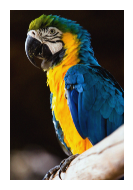

In [16]:
plt.figure(figsize=(2, 2))
plt.axis("off")
plt.tight_layout()
plt.imshow(blurred_image)


In [17]:

input = np.expand_dims(blurred_image, axis=0)
restored = autoencoder.predict(input)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


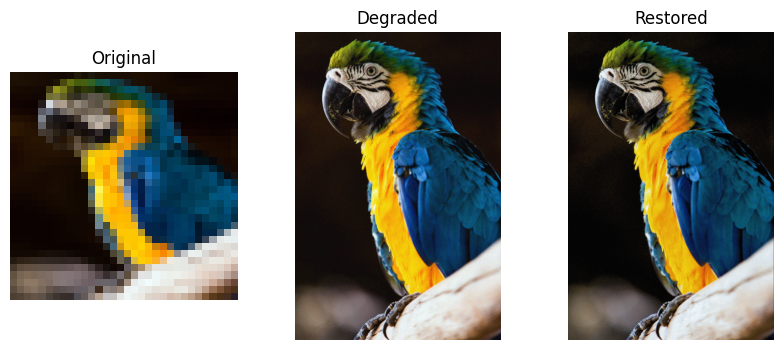

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(resized_img)
axes[0].set_title("Original")
axes[1].imshow(blurred_image)
axes[1].set_title("Degraded")
axes[2].imshow(restored)
axes[2].set_title("Restored")

for ax in axes:
    ax.axis("off")

plt.show()

In [19]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

In [20]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [21]:

def build_alexnet():
    model = Sequential([
        Conv2D(96, (11,11), strides=4, activation='relu', input_shape=(32,32,3), padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Conv2D(256, (5,5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Conv2D(384, (3,3), activation='relu', padding='same'),
        Conv2D(384, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    return model

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

alexnet_pretrained = build_alexnet()

vgg_conv_layers = [layer for layer in vgg16.layers if 'conv' in layer.name][1:5]  # Skip first layer
alexnet_conv_layers = [layer for layer in alexnet_pretrained.layers if 'conv' in layer.name][1:]  # Skip first layer

# Ensure layer count matches
assert len(vgg_conv_layers) == len(alexnet_conv_layers), "Mismatch in layer count!"

# Transfer Weights for Convolutional Layers (Skipping First Layer)
for vgg_layer, alex_layer in zip(vgg_conv_layers, alexnet_conv_layers):
    if vgg_layer.get_weights()[0].shape == alex_layer.get_weights()[0].shape:  # Check shape compatibility
        alex_layer.set_weights(vgg_layer.get_weights())
        alex_layer.trainable = False  # Freeze them


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='softmax')(x)

vgg16 = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:

alexnet_pretrained.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
import time

In [25]:

def train_and_evaluate(model, name):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    end_time = time.time()
    inference_time = end_time - start_time
    print(f"{name} Training Time: {inference_time:.2f} sec")
    return history, inference_time

In [26]:

history_alexnet, time_alexnet = train_and_evaluate(alexnet_pretrained, "AlexNet")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.0199 - loss: 4.4714 - val_accuracy: 0.0635 - val_loss: 3.9913
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.0799 - loss: 3.9172 - val_accuracy: 0.1213 - val_loss: 3.7160
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1189 - loss: 3.6647 - val_accuracy: 0.1470 - val_loss: 3.5520
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1511 - loss: 3.4821 - val_accuracy: 0.1654 - val_loss: 3.4707
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1829 - loss: 3.3041 - val_accuracy: 0.1923 - val_loss: 3.3019
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2169 - loss: 3.1161 - val_accuracy: 0.2244 - val_loss: 3.1560
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2494 - loss: 2.9579 - val_accuracy: 0.2250 - val_loss: 3.1641
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2780 - loss: 2.7975 - val

In [27]:

history_vgg16, time_vgg16 = train_and_evaluate(vgg16, "VGG16")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.1299 - loss: 3.8304 - val_accuracy: 0.2821 - val_loss: 2.9387
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2585 - loss: 3.0052 - val_accuracy: 0.3108 - val_loss: 2.7693
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2929 - loss: 2.8311 - val_accuracy: 0.3221 - val_loss: 2.6855
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3116 - loss: 2.7291 - val_accuracy: 0.3377 - val_loss: 2.6214
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3316 - loss: 2.6348 - val_accuracy: 0.3479 - val_loss: 2.5816
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3434 - loss: 2.5773 - val_accuracy: 0.3531 - val_loss: 2.5626
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3485 - loss: 2.5284 - val_accuracy: 0.3564 - val_loss: 2.5423
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3606 - loss: 2.4716 - 

In [28]:
def plot_history(history, model_name):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

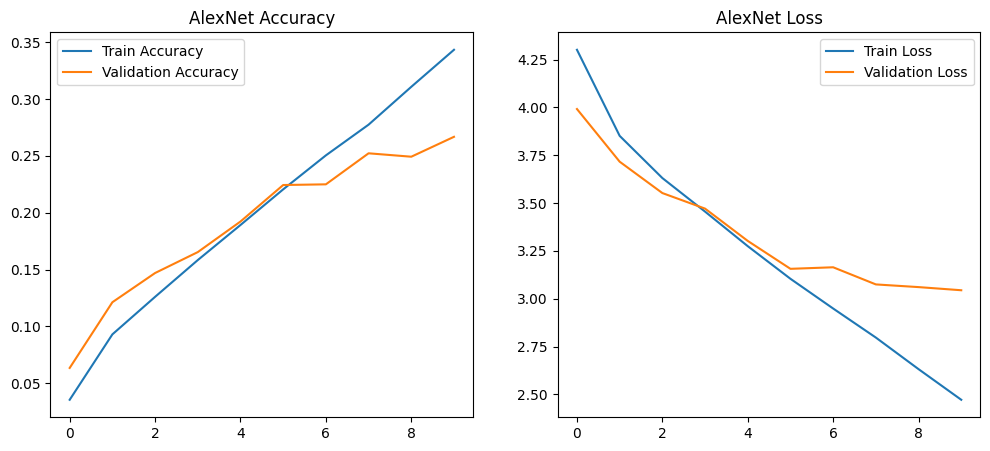

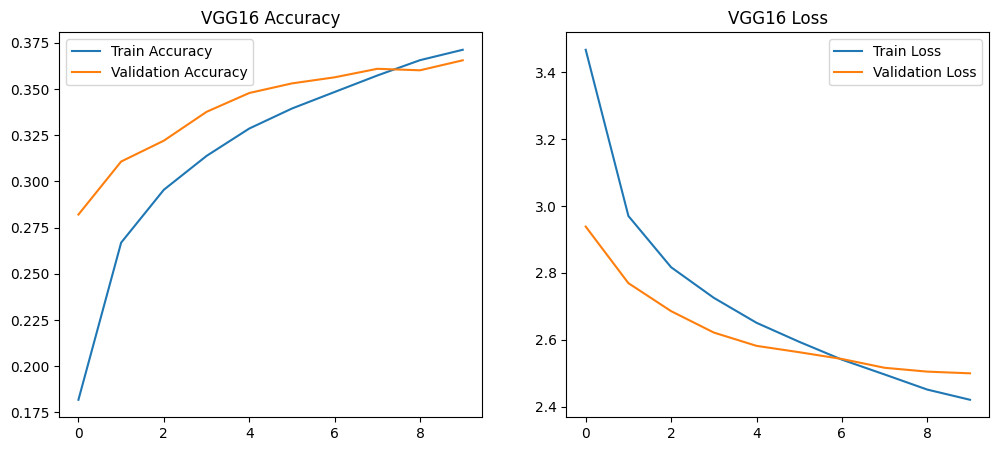

AlexNet Inference Time: 112.94 sec
VGG16 Inference Time: 137.68 sec


In [29]:

plot_history(history_alexnet, "AlexNet")
plot_history(history_vgg16, "VGG16")

print(f"AlexNet Inference Time: {time_alexnet:.2f} sec")
print(f"VGG16 Inference Time: {time_vgg16:.2f} sec")